In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

https://chatgpt.com/share/697e175b-a7a8-8002-a887-10d254498a0c

__Link chat DI Pi Ti__

In [4]:
df_train = pd.read_csv("Data/Data_Train.csv")
df_test = pd.read_csv("Data/Data_Test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90558 entries, 0 to 90557
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MA_SO_SV                 90558 non-null  object 
 1   HOC_KY                   90558 non-null  object 
 2   CPA                      90558 non-null  float64
 3   GPA                      90558 non-null  float64
 4   TC_DANGKY                90558 non-null  int64  
 5   TC_HOANTHANH             90558 non-null  int64  
 6   NAM_TUYENSINH            90558 non-null  int64  
 7   PTXT                     90558 non-null  int64  
 8   TOHOP_XT                 90558 non-null  int64  
 9   DIEM_TRUNGTUYEN          90558 non-null  float64
 10  DIEM_CHUAN               90558 non-null  float64
 11  TI_LE_HOAN_THANH         90558 non-null  float64
 12  NAM_HOC                  90558 non-null  int64  
 13  NAM                      90558 non-null  int64  
 14  SO_HOC_KY             

In [8]:
df_train.head()

,MA_SO_SV,HOC_KY,CPA,GPA,TC_DANGKY,TC_HOANTHANH,NAM_TUYENSINH,PTXT,TOHOP_XT,DIEM_TRUNGTUYEN,DIEM_CHUAN,TI_LE_HOAN_THANH,NAM_HOC,NAM,SO_HOC_KY,KHOANG_CACH_TRUNG_TUYEN,TAC_DONG_TU_NHIEN,HOC_PHI_TRUNG_BINH,TY_LE_THAT_NGHIEP
0,f022ed8d1ac1,HK2 2020-2021,2.19,2.02,18,18,2020,1,1,23.96,21.72,1.000000,2020,2021,2,2.24,1,18,14.429
1,f022ed8d1ac1,HK1 2022-2023,0.95,2.12,14,7,2020,1,1,23.96,21.72,0.500000,2022,2022,5,2.24,0,18,16.192
2,f022ed8d1ac1,HK1 2023-2024,0.81,1.89,29,16,2020,1,1,23.96,21.72,0.551724,2023,2023,7,2.24,1,20,16.944
3,f022ed8d1ac1,HK2 2022-2023,1.37,1.93,26,23,2020,1,1,23.96,21.72,0.884615,2022,2023,6,2.24,0,18,16.944
4,75fc14669ae4,HK2 2022-2023,3.68,3.53,20,20,2018,1,1,21.03,17.28,1.000000,2022,2023,10,3.75,0,18,16.944


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144 entries, 0 to 15143
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MA_SO_SV                 15144 non-null  object 
 1   HOC_KY                   15144 non-null  object 
 2   CPA                      15144 non-null  float64
 3   GPA                      15144 non-null  float64
 4   TC_DANGKY                15144 non-null  int64  
 5   TC_HOANTHANH             15144 non-null  int64  
 6   NAM_TUYENSINH            15144 non-null  int64  
 7   PTXT                     15144 non-null  int64  
 8   TOHOP_XT                 15144 non-null  int64  
 9   DIEM_TRUNGTUYEN          15144 non-null  float64
 10  DIEM_CHUAN               15144 non-null  float64
 11  TI_LE_HOAN_THANH         15144 non-null  float64
 12  NAM_HOC                  15144 non-null  int64  
 13  NAM                      15144 non-null  int64  
 14  SO_HOC_KY             

In [12]:
features = [
    "CPA",
    "GPA",
    "TC_DANGKY",
    "NAM_TUYENSINH",
    "PTXT",
    "TOHOP_XT",
    "KHOANG_CACH_TRUNG_TUYEN",
    "TAC_DONG_TU_NHIEN",
    "HOC_PHI_TRUNG_BINH",
    "TY_LE_THAT_NGHIEP"
]
X_train = df_train[features]
y_train = df_train["TC_HOANTHANH"]

X_test = df_test[features]
y_test = df_test["TC_HOANTHANH"]

# Thử với LinearRegression

In [15]:
model_Linear =  LinearRegression()
model_Linear.fit(X_train, y_train)
y_pred_Linear =  model_Linear.predict(X_test)

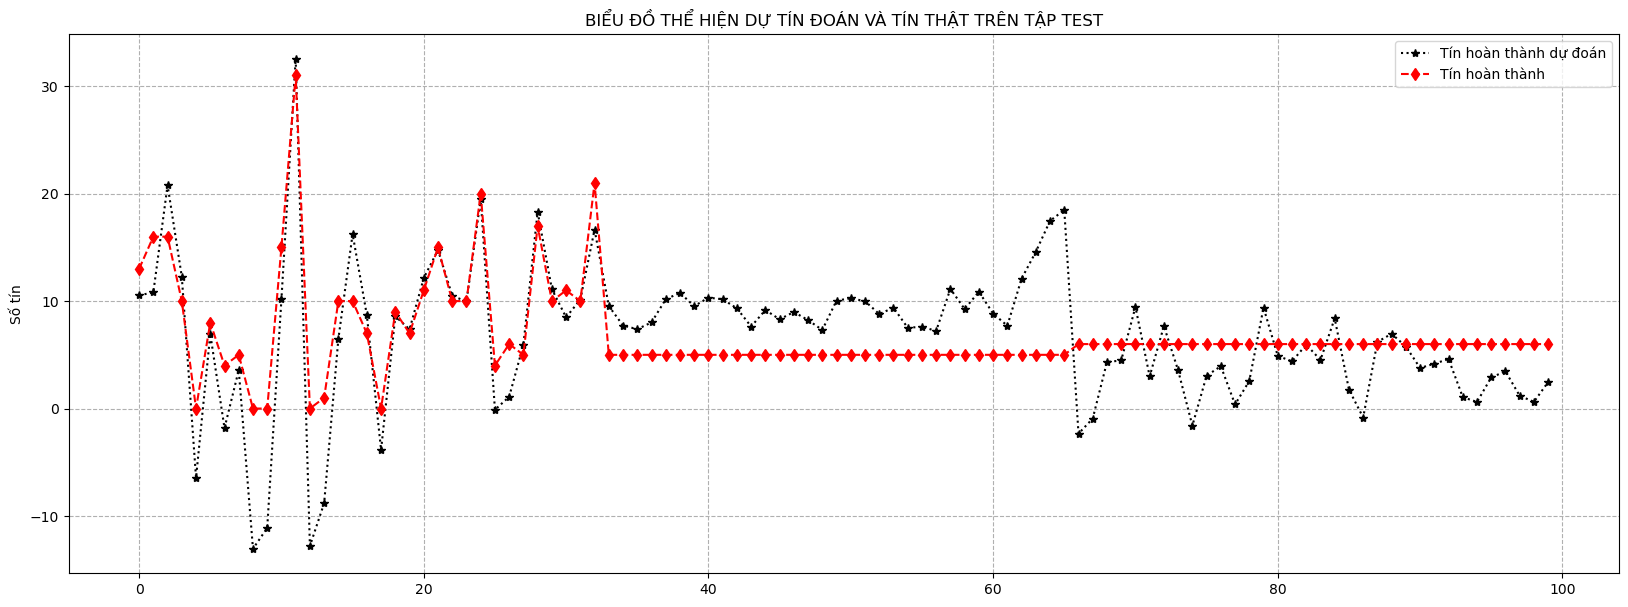

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(y_pred_Linear[:100], marker='*',color ='black', linestyle=':', label='Tín hoàn thành dự đoán')
plt.plot(y_test[:100].values.ravel(), marker='d', color='red', linestyle='--', label='Tín hoàn thành')
plt.title('BIỂU ĐỒ THỂ HIỆN DỰ TÍN ĐOÁN VÀ TÍN THẬT TRÊN TẬP TEST')
plt.ylabel("Số tín")
plt.legend()
plt.grid(ls='--')
plt.show()


# Thử với RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

model_RanDomForest = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
# pri
model_RanDomForest.fit(X_train, y_train)
y_pred_RandomForest = model_RanDomForest.predict(X_test)

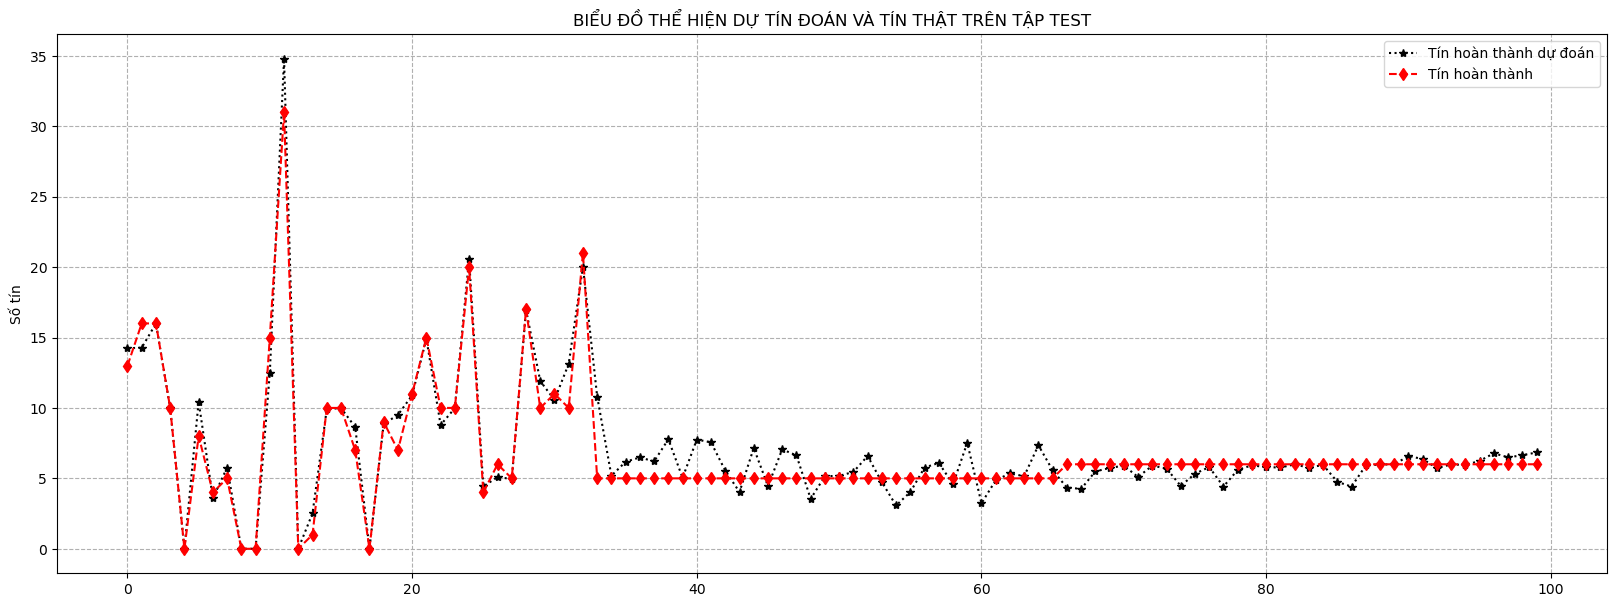

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(y_pred_RandomForest[:100], marker='*',color ='black', linestyle=':', label='Tín hoàn thành dự đoán')
plt.plot(y_test[:100].values.ravel(), marker='d', color='red', linestyle='--', label='Tín hoàn thành')
plt.title('BIỂU ĐỒ THỂ HIỆN DỰ TÍN ĐOÁN VÀ TÍN THẬT TRÊN TẬP TEST')
plt.ylabel("Số tín")
plt.legend()
plt.grid(ls='--')
plt.show()


# So sánh 2 cái 

In [20]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error
)
import numpy as np
# Linear
r2_Linear   = r2_score(y_test, y_pred_Linear)
mse_Linear  = mean_squared_error(y_test, y_pred_Linear)
rmse_Linear = root_mean_squared_error(y_test, y_pred_Linear)

# Randomforest
r2_Randomforest   = r2_score(y_test, y_pred_RandomForest)
mse_Randomforest  = mean_squared_error(y_test, y_pred_RandomForest)
rmse_Randomforest = root_mean_squared_error(y_test, y_pred_RandomForest)



mask = y_test != 0
mape_Linear = np.mean(
    np.abs((y_test[mask] - y_pred_Linear[mask]) / y_test[mask])
) * 100

mape_Randomforest = np.mean(
    np.abs((y_test[mask] - y_pred_RandomForest[mask]) / y_test[mask])
) * 100
print("Linear")
print(f"R²   = {r2_Linear:.3f}")
print(f"MSE  = {mse_Linear:.3f}")
print(f"RMSE = {rmse_Linear:.3f}")
print(f"MAPE = {mape_Linear:.2f}%")

print("\nRandomForest")
print(f"R²   = {r2_Randomforest:.3f}")
print(f"MSE  = {mse_Randomforest:.3f}")
print(f"RMSE = {rmse_Randomforest:.3f}")
print(f"MAPE = {mape_Randomforest:.2f}%")


Linear
R²   = 0.757
MSE  = 11.953
RMSE = 3.457
MAPE = 30.50%

RandomForest
R²   = 0.959
MSE  = 2.013
RMSE = 1.419
MAPE = 9.12%


# Chọn RandomForest

In [22]:
import pandas as pd

rf_importance = pd.Series(
    model_RanDomForest.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(rf_importance)


CPA                        0.545744
TC_DANGKY                  0.432319
GPA                        0.014456
KHOANG_CACH_TRUNG_TUYEN    0.002326
NAM_TUYENSINH              0.002010
TY_LE_THAT_NGHIEP          0.001604
TOHOP_XT                   0.000679
TAC_DONG_TU_NHIEN          0.000591
HOC_PHI_TRUNG_BINH         0.000161
PTXT                       0.000110
dtype: float64


In [23]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    model_RanDomForest,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance = pd.Series(
    r.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

print(perm_importance)


CPA                        1.200415
TC_DANGKY                  0.955381
GPA                        0.030308
NAM_TUYENSINH              0.000490
TOHOP_XT                   0.000125
KHOANG_CACH_TRUNG_TUYEN    0.000061
PTXT                       0.000022
TAC_DONG_TU_NHIEN          0.000000
HOC_PHI_TRUNG_BINH         0.000000
TY_LE_THAT_NGHIEP          0.000000
dtype: float64


In [24]:
# Phân cụm sinh viên

In [ ]:
# Chjat